In [1]:
# 특징 공학 (feature engineering)
# => 문제에 대해 가지고 있는 정보를 모두 취해 특징 행렬을 구축하는데 사용할 수 있는 숫자로 변환

In [2]:
# 범주 데이터(categorical data)를 표현하는 특징
# 텍스트를 표현하는 특징
# 이미지를 표현하는 특징
# 모델 복잡도를 증가시키기 위한 유도 특징(derived feature)
# 누락 데이터 대체
# 임의의 데이터를 벡터로 전환 => 벡터화(vectoriaztion)

In [3]:
# 범주 특징
"비수치 데이터의 일반적인 유형 중 하나는 범주 데이터(categorical data)"
"예를 들어 주택 가격 데이터"

data = [
    {"price": 85000, "rooms": 4, "neighborhood": "Queen Anne"},
    {"price": 70000, "rooms": 3, "neighborhood": "Fremont"},
    {"price": 65000, "rooms": 3, "neighborhood": "Wallingford"},
    {"price": 60000, "rooms": 2, "neighborhood": "Fremont"},
    ]

# 간단한 수치 매핑으로 인코딩
{"Queen Anne": 1, "Fremont": 2, "Wallingford": 3}; # SciKit-Learn에 유용하지 않다
# 모델이 수치 특징은 대수적인양을 반영한다고 가정하기떄문
# Queen Anne < Fremont < Wallingford... 말도 안 되는 관계를 의미

In [4]:
# 해당 범주의 유무를 각각 1이나 0으로 나타내는 추가 열을 생성
# 원-핫 인코딩(one-hot encoding)
# 데이터가 딕셔너리의 리스트 형태라면 DictVectorizer 이용
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[    0,     1,     0, 85000,     4],
       [    1,     0,     0, 70000,     3],
       [    0,     0,     1, 65000,     3],
       [    1,     0,     0, 60000,     2]])

In [5]:
vec.get_feature_names_out()
# 해당 범주에 들어갈 수 있는 값이 많은 경우 데이터세트의 크기가 엄청나게 커질 수 있다

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [6]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [7]:
# 텍스트 특징
# ex. 소셜미디어 데이터 마이닝 기법 (텍스트를 숫자로 인코딩) (e.g. word count...)
sample = ["problem of evil",
          "evil queen",
          "horizon problem",]

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [8]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [9]:
# 단어 수에 가중치를 부여하는 TF-IDF (term frequency-inverse document frequency)
# 단어 빈도 - 역문서 빈도
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


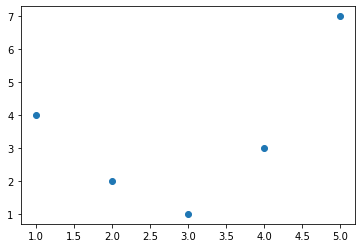

In [10]:
# 이미지 특징

# 유도 특징
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt

x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])
plt.scatter(x, y);

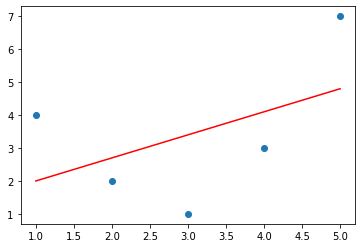

In [11]:
# LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = x[:, np.newaxis]
model.fit(X, y)
y_fit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_fit, color="r");

In [12]:
# Add polynomial features (3-degree)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

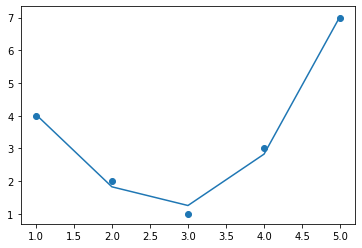

In [13]:
# linear regression on polynomial features
model = LinearRegression().fit(X2, y)
y_fit = model.predict(X2)
plt.scatter(x, y)
plt.plot(X, y_fit);

"모델을 바꾸지 않고 입력값을 변환해서 모델을 개선한다는 개념";

In [14]:
# 누락 데이터의 대체 (imputation)
from numpy import nan
X = np.array([[nan, 0, 3],
              [3, 7, 9],
              [3, 5, 2],
              [4, nan, 6],
              [8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])

In [15]:
# 평균, 중앙값, 최빈값을 사용하는 기본 대체 방식 => SciKit-Learn Imputer 클래스
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [16]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [17]:
# 특징 파이프라인 => 여러 단계를 하나로 묶기
"""
1. 누락된 값을 평균으로 대체한다
2. 특징을 이차 형태로 전환한다
3. 선형 회귀를 적합시킨다
"""

from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy="mean"), PolynomialFeatures(degree=2),
                      LinearRegression())

In [19]:
# 파이프라인은 표준 SciKit-Learn 객체처럼 동작
model.fit(X, y) # X는 누락된 데이터를 포함한 오리지널 데이터세트
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
